#**Getting started**

For this lab, clone the repository below to obtain the necessary files. 

In [ ]:
%%bash
git clone https://github.com/Mangul-Lab-USC/BWA_Tutorial.git

Cloning into 'BWA_Tutorial'...


Notably, this repository contains a reference genome for an HIV virus as well as a short FASTA file containing sequences from human cells. These files are named `HIV_ref.fasta` and `reads.fasta` respectively.

Using the `head` command, we can take a peek at the two files. We will not use `cat` in this case because `cat` would print out the entire`.fasta` file, even if the file was several gigabytes in size. 

In [ ]:
%%bash
head BWA_Tutorial/reads.fasta

>human_read1
CCCTTTTAGTCAGTGTGGAAAAATCTCTAGCAGTGGCGCCCGAACAGGGACCTGAAAGCGAAAGGGAAACC
>human_read2
CAGCCCACCAGAAGAGAGCGGCAGGTCTGGGGTAGAGACAACAACTCCCCCTCAGAAGCAGGAGCCGATAG
>human_read3
GTGGAAGGAAGCAACCACCACTCTATTTTGTGCATCAGATGCTAAAGCAATATGATACAGAGGTACATAATGTTTGGGCCACACATGCCGGTGTA



In [ ]:
%%bash
head BWA_Tutorial/HIV_ref.fasta

>HIV_complete_genome
GGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTAACTAGGGAACCCACTGCTTAAGCC
TCAATAAAGCTTGCCTTGAGTGCTTCAAGTAGTGTGTGCCCGTCTGTTGTGTGACTCTGGTAACTAGAGA
TCCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCAGTGGCGCCCGAACAGGGACCTGAAAGCGAA
AGGGAAACCAGAGGAGCTCTCTCGACGCAGGACTCGGCTTGCTGAAGCGCGCACGGCAAGAGGCGAGGGG
CGGCGACTGGTGAGTACGCCAAAAATTTTGACTAGCGGAGGCTAGAAGGAGAGAGATGGGTGCGAGAGCG
TCAGTATTAAGCGGGGGAGAATTAGATCGATGGGAAAAAATTCGGTTAAGGCCAGGGGGAAAGAAAAAAT
ATAAATTAAAACATATAGTATGGGCAAGCAGGGAGCTAGAACGATTCGCAGTTAATCCTGGCCTGTTAGA
AACATCAGAAGGCTGTAGACAAATACTGGGACAGCTACAACCATCCCTTCAGACAGGATCAGAAGAACTT
AGATCATTATATAATACAGTAGCAACCCTCTATTGTGTGCATCAAAGGATAGAGATAAAAGACACCAAGG


Notably, the `reads.fasta` file contains three FASTA records. If it contained more than could be viewed with `head`, we could count the number of FASTA records with the following command.

In [ ]:
%%bash
grep '>' BWA_Tutorial/reads.fasta | wc -l

3


#**Introduction to sequence alignment and `conda`**

In the previous module, you learned how to install bioinformatic tools written in R. While installing R packages is fairly standardized, the installation of other bioinformatics tools can vary greatly.

To address this, packages managers have been developed to simplify the software installation process. The package manager we will introduce today is called Anaconda.



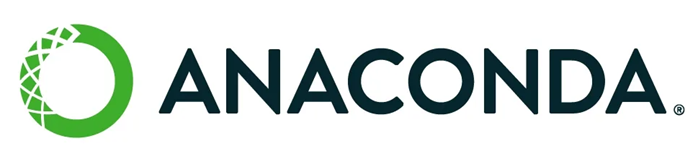

The core of Anaconda is the `conda` command which automates the installation of softare within isolated environents. By using these environments, software that would noramlly conflict with one another can be run on the same device.

The version of Anaconda we will use in this lab is called Miniconda as it is a streamlined version of the full Anaconda package.

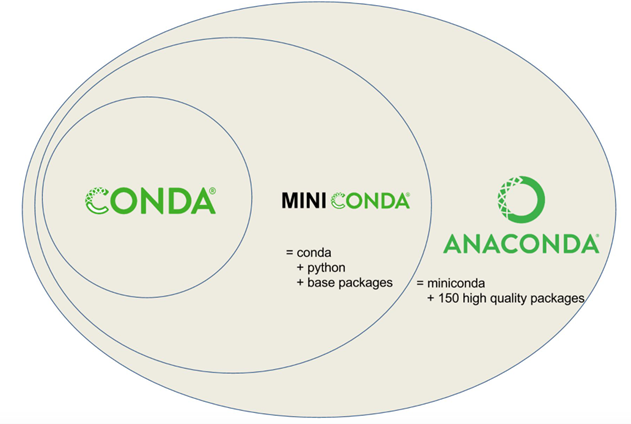

##**Install Miniconda 4.10.3.**
Here, we download a Unix shell script (.sh) which contains code to download and install Miniconda. 

Additionaly, we append the code `&>/dev/null` to the end of the commands to minimize the output printed to the notebook, similarly to how we used `quiet = TRUE` arguments in the R module.



In [ ]:
%%bash
wget https://repo.anaconda.com/miniconda/Miniconda3-py39_4.10.3-Linux-x86_64.sh &>/dev/null
chmod u+x Miniconda3-py39_4.10.3-Linux-x86_64.sh
./Miniconda3-py39_4.10.3-Linux-x86_64.sh -b -f -p /usr/local &>/dev/null

Note that the link to the Miniconda shell script provided above contains a slightly old version of Miniconda. However, instead of manually searching for an updated link, it is simpler to run the code below to update Miniconda.

###**Update Miniconda to the latest version.**

Notice that the `--yes` argument is added below to prevent `conda` from waiting for user input. This is akin to the `ask = FALSE` argument also presented in the R module.

In [ ]:
%%bash
conda update -n base -c defaults conda --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.26 |       h06a4308_2         115 KB
    certifi-2021.10.8          |   py39h06a4308_2         151 KB
    cffi-1.15.0                |   py39hd667e15_1         225 KB
    charset-normalizer-2.0.4   |     pyhd3eb1b0_0          35 KB
    conda-4.11.0               |   py39h06a4308_0        14.4 MB
    cryptography-36.0.0        |   py39h9ce1e76_0         1.3 MB
    idna-3.3                   |     pyhd3eb1b0_0          49 KB
    ncurses-6.3                |       h7f8727e_2         782 KB
    openssl-1.1.1m             |       h7f8727e_0         2.5 MB
    pycparser-2.21             |     pyhd3eb1b0_0          94 KB
    pyopenssl-21.0.0           |     pyhd3eb1b0_1          49 KB
    r

Once Miniconda is installed, we can create a `conda` environment to store the software we want to install. 

###**Create a new conda environment called `lab10Environment`.**

In [ ]:
%%bash
conda create --name lab10Environment --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local/envs/lab10Environment



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
#
# To activate this environment, use
#
#     $ conda activate lab10Environment
#
# To deactivate an active environment, use
#
#     $ conda deactivate



While the above output states you can use `conda activate lab10Environment` to activate the new environment, within Colab notebooks you must instead use `source activate lab10Environment`. Additionally, because this command does not persist between code-blocks, it must be placed under `%%bash` every time you want to use `lab10Environment`.

Next, we will install BWA within this conda environment. To verify that BWA is available through `conda`, you may google the phrase "conda bwa". The top result should be https://anaconda.org/bioconda/bwa , shown below.

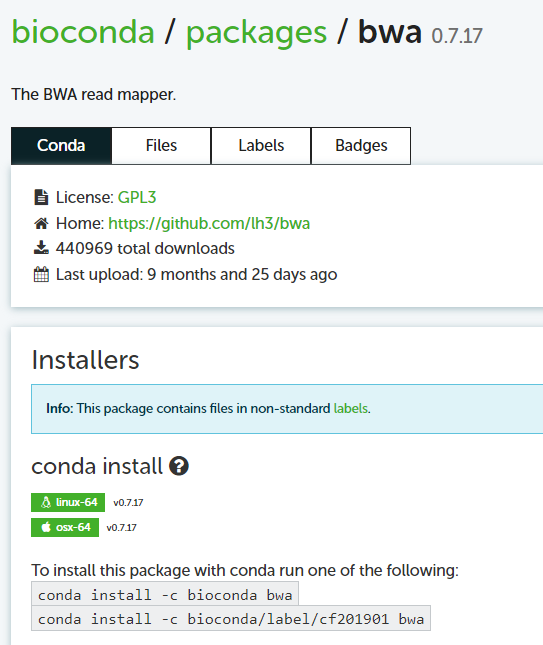

As you can see, the code to install BWA is provided in the webpage. However, like before, we must add the `--yes` option to use the command within Google Colaboratory.

###**Install BWA using Miniconda.**

In [ ]:
%%bash
source activate lab10Environment
conda install -c bioconda bwa --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local/envs/lab10Environment

  added / updated specs:
    - bwa


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bwa-0.7.17                 |       h5bf99c6_8         608 KB  bioconda
    perl-5.26.2                |       h14c3975_0        10.5 MB
    ------------------------------------------------------------
                                           Total:        11.0 MB

The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1-main
  _openmp_mutex      pkgs/main/linux-64::_openmp_mutex-4.5-1_gnu
  bwa                bioconda/linux-64::bwa-0.7.17-h5bf99c6_8
  libgcc-ng          pkgs/main/linux-64::libgcc-ng-9.3.0-h5101ec6_17
  libgomp            pkgs/main/linux-64::libgomp-9.3.0-h5101ec6_17
  perl               pkgs/main/linux-64::perl-5.26.2-h1

###**Confirm BWA runs by checking its subcommand documentation.**

Like the `git` command, `bwa` also uses subcommands.

In [ ]:
%%bash
source activate lab10Environment
bwa 


Program: bwa (alignment via Burrows-Wheeler transformation)
Version: 0.7.17-r1188
Contact: Heng Li <lh3@sanger.ac.uk>

Usage:   bwa <command> [options]

Command: index         index sequences in the FASTA format
         mem           BWA-MEM algorithm
         fastmap       identify super-maximal exact matches
         pemerge       merge overlapping paired ends (EXPERIMENTAL)
         aln           gapped/ungapped alignment
         samse         generate alignment (single ended)
         sampe         generate alignment (paired ended)
         bwasw         BWA-SW for long queries

         shm           manage indices in shared memory
         fa2pac        convert FASTA to PAC format
         pac2bwt       generate BWT from PAC
         pac2bwtgen    alternative algorithm for generating BWT
         bwtupdate     update .bwt to the new format
         bwt2sa        generate SA from BWT and Occ

Note: To use BWA, you need to first index the genome with `bwa index'.
      There are

Now that BWA is sucessefully installed, we will use the `bwa index` subcommand to prepare our reference genome for pairwise alignment by converting it into special data structures to aid computation of the sequence alignments later on. 

###**Lookup the help page for the `bwa index` subcommand.**

In [ ]:
%%bash
source activate lab10Environment
bwa index 


Usage:   bwa index [options] <in.fasta>

Options: -a STR    BWT construction algorithm: bwtsw, is or rb2 [auto]
         -p STR    prefix of the index [same as fasta name]
         -b INT    block size for the bwtsw algorithm (effective with -a bwtsw) [10000000]
         -6        index files named as <in.fasta>.64.* instead of <in.fasta>.* 

         `-a div' do not work not for long genomes.



Here, `in.fasta` denotes our reference fasta file to create an index for. Additionally, let's use the `-p` argument to store the special data structures in the `/content` folder with the prefix `HIV_ref`.

##**Create an index of the reference genome `HIV_ref.fasta`.**

In [ ]:
%%bash
source activate lab10Environment
bwa index -p HIV_ref BWA_Tutorial/HIV_ref.fasta

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index -p HIV_ref BWA_Tutorial/HIV_ref.fasta
[main] Real time: 0.045 sec; CPU: 0.008 sec


Next, we can use `bwa mem` to align our reads using the newly generated index.

In [ ]:
%%bash
source activate lab10Environment
bwa mem


Usage: bwa mem [options] <idxbase> <in1.fq> [in2.fq]

Algorithm options:

       -t INT        number of threads [1]
       -k INT        minimum seed length [19]
       -w INT        band width for banded alignment [100]
       -d INT        off-diagonal X-dropoff [100]
       -r FLOAT      look for internal seeds inside a seed longer than {-k} * FLOAT [1.5]
       -y INT        seed occurrence for the 3rd round seeding [20]
       -c INT        skip seeds with more than INT occurrences [500]
       -D FLOAT      drop chains shorter than FLOAT fraction of the longest overlapping chain [0.50]
       -W INT        discard a chain if seeded bases shorter than INT [0]
       -m INT        perform at most INT rounds of mate rescues for each read [50]
       -S            skip mate rescue
       -P            skip pairing; mate rescue performed unless -S also in use

Scoring options:

       -A INT        score for a sequence match, which scales options -TdBOELU unless overridden [1]
     

Here, `idxbase` denotes the prefix of our index files and `in1.fq` denotes the reads to align against the index. Additionaly, by default, the output is in SAM format.

##**Align the `reads.fasta` file against the HIV reference index.**

In [ ]:
%%bash
source activate lab10Environment
bwa mem HIV_ref BWA_Tutorial/reads.fasta > alignments.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 3 sequences (237 bp)...
[M::mem_process_seqs] Processed 3 reads in 0.000 CPU sec, 0.000 real sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa mem HIV_ref BWA_Tutorial/reads.fasta
[main] Real time: 0.007 sec; CPU: 0.004 sec


Now that we have obtained a SAM file, we can perform manipulations on it with the program SAMtools.

##**Install SAMtools into the same conda environment.**

In [ ]:
%%bash
source activate lab10Environment
conda install -c bioconda samtools --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local/envs/lab10Environment

  added / updated specs:
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    c-ares-1.18.1              |       h7f8727e_0         114 KB
    curl-7.80.0                |       h7f8727e_0          95 KB
    krb5-1.19.2                |       hac12032_0         1.2 MB
    libcurl-7.80.0             |       h0b77cf5_0         339 KB
    libedit-3.1.20210910       |       h7f8727e_0         166 KB
    libev-4.33                 |       h7f8727e_1         111 KB
    libgcc-7.2.0               |       h69d50b8_2         269 KB
    libnghttp2-1.46.0          |       hce63b2e_0         680 KB
    libssh2-1.9.0              |       h1ba5d50_1         269 KB
    samtools-1.7               |             

##**Verify that SAMtools was successfuly installed.**

In [ ]:
%%bash
source activate lab10Environment
samtools


Program: samtools (Tools for alignments in the SAM format)
Version: 1.7 (using htslib 1.7)

Usage:   samtools <command> [options]

Commands:
  -- Indexing
     dict           create a sequence dictionary file
     faidx          index/extract FASTA
     index          index alignment

  -- Editing
     calmd          recalculate MD/NM tags and '=' bases
     fixmate        fix mate information
     reheader       replace BAM header
     targetcut      cut fosmid regions (for fosmid pool only)
     addreplacerg   adds or replaces RG tags
     markdup        mark duplicates

  -- File operations
     collate        shuffle and group alignments by name
     cat            concatenate BAMs
     merge          merge sorted alignments
     mpileup        multi-way pileup
     sort           sort alignment file
     split          splits a file by read group
     quickcheck     quickly check if SAM/BAM/CRAM file appears intact
     fastq          converts a BAM to a FASTQ
     fasta         

##**Convert the alignment SAM file into BAM format.**

Here, the option `-b` indicate that the input should be converted to BAM format.

In [ ]:
%%bash
source activate lab10Environment
samtools view -b alignments.sam > alignments.bam

Recall that BAM format is the compressed, binary version of SAM format. Therefore, we cannot read BAM files with base Unix commands.

In [ ]:
%%bash
head alignments.bam

�     � BC � sr�e,d``p������O��-�I-I�OO���M���4�0�rp��t�J*O��Sa~Vz�z��E����> a���\�AE�i
N��!�%�E��9�E��)�zi��%�\�@KE���w� �.��   �     � BC �� S����S�H��( �e��&���&�2(020��
�4:==<\%44D=\T�T]�ZETE\��S��:3��D�08;�G;3�:|)17b0 �@ga`PtRRtQq��pqittT�PR� �*��(96:P���@��9�����=`��m�x����cfH�?`b` ���� �--�M"N�@��	!!	���%!!	'*y�'�����1y/�= v���Y  �     � BC           

Instead, we will again use the `samtools view` subcommand.

##**View the BAM file with `samtools view`.**

In [ ]:
%%bash
source activate lab10Environment
samtools view alignments.bam

human_read1	0	HIV_complete_genome	150	60	18M1I52M	*	0	0	CCCTTTTAGTCAGTGTGGAAAAATCTCTAGCAGTGGCGCCCGAACAGGGACCTGAAAGCGAAAGGGAAACC	*	NM:i:1	MD:Z:70	AS:i:63	XS:i:0
human_read2	0	HIV_complete_genome	1702	60	3M1D68M	*	0	0	CAGCCCACCAGAAGAGAGCGGCAGGTCTGGGGTAGAGACAACAACTCCCCCTCAGAAGCAGGAGCCGATAG	*	NM:i:3	MD:Z:3^C16T0T50	AS:i:58	XS:i:0
human_read3	0	HIV_complete_genome	5902	60	48M1I46M	*	0	0	GTGGAAGGAAGCAACCACCACTCTATTTTGTGCATCAGATGCTAAAGCAATATGATACAGAGGTACATAATGTTTGGGCCACACATGCCGGTGTA	*	NM:i:2	MD:Z:88T5	AS:i:82	XS:i:0


Notice how the above SAM-format output does not contain headers, yet the original SAM file did contain headers. 

In [ ]:
%%bash
head alignments.sam

@SQ	SN:HIV_complete_genome	LN:9181
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem HIV_ref BWA_Tutorial/reads.fasta
human_read1	0	HIV_complete_genome	150	60	18M1I52M	*	0	0	CCCTTTTAGTCAGTGTGGAAAAATCTCTAGCAGTGGCGCCCGAACAGGGACCTGAAAGCGAAAGGGAAACC	*	NM:i:1	MD:Z:70	AS:i:63	XS:i:0
human_read2	0	HIV_complete_genome	1702	60	3M1D68M	*	0	0	CAGCCCACCAGAAGAGAGCGGCAGGTCTGGGGTAGAGACAACAACTCCCCCTCAGAAGCAGGAGCCGATAG	*	NM:i:3	MD:Z:3^C16T0T50	AS:i:58	XS:i:0
human_read3	0	HIV_complete_genome	5902	60	48M1I46M	*	0	0	GTGGAAGGAAGCAACCACCACTCTATTTTGTGCATCAGATGCTAAAGCAATATGATACAGAGGTACATAATGTTTGGGCCACACATGCCGGTGTA	*	NM:i:2	MD:Z:88T5	AS:i:82	XS:i:0


Therefore, to preserve the headers we can add the `-h`/`--with-header` option.

In [ ]:
%%bash
source activate lab10Environment
samtools view -h alignments.bam

@SQ	SN:HIV_complete_genome	LN:9181
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem HIV_ref BWA_Tutorial/reads.fasta
human_read1	0	HIV_complete_genome	150	60	18M1I52M	*	0	0	CCCTTTTAGTCAGTGTGGAAAAATCTCTAGCAGTGGCGCCCGAACAGGGACCTGAAAGCGAAAGGGAAACC	*	NM:i:1	MD:Z:70	AS:i:63	XS:i:0
human_read2	0	HIV_complete_genome	1702	60	3M1D68M	*	0	0	CAGCCCACCAGAAGAGAGCGGCAGGTCTGGGGTAGAGACAACAACTCCCCCTCAGAAGCAGGAGCCGATAG	*	NM:i:3	MD:Z:3^C16T0T50	AS:i:58	XS:i:0
human_read3	0	HIV_complete_genome	5902	60	48M1I46M	*	0	0	GTGGAAGGAAGCAACCACCACTCTATTTTGTGCATCAGATGCTAAAGCAATATGATACAGAGGTACATAATGTTTGGGCCACACATGCCGGTGTA	*	NM:i:2	MD:Z:88T5	AS:i:82	XS:i:0


Finally, while one may easily determine that the aligned regions in our example have a depth of 1, when more than one read align to the same loci, the following command may be used.

##**Investigate the sequencing depth of the aligned regions using `samtools depth`.**

In [ ]:
%%bash
source activate lab10Environment
samtools depth alignments.bam

HIV_complete_genome	150	1
HIV_complete_genome	151	1
HIV_complete_genome	152	1
HIV_complete_genome	153	1
HIV_complete_genome	154	1
HIV_complete_genome	155	1
HIV_complete_genome	156	1
HIV_complete_genome	157	1
HIV_complete_genome	158	1
HIV_complete_genome	159	1
HIV_complete_genome	160	1
HIV_complete_genome	161	1
HIV_complete_genome	162	1
HIV_complete_genome	163	1
HIV_complete_genome	164	1
HIV_complete_genome	165	1
HIV_complete_genome	166	1
HIV_complete_genome	167	1
HIV_complete_genome	168	1
HIV_complete_genome	169	1
HIV_complete_genome	170	1
HIV_complete_genome	171	1
HIV_complete_genome	172	1
HIV_complete_genome	173	1
HIV_complete_genome	174	1
HIV_complete_genome	175	1
HIV_complete_genome	176	1
HIV_complete_genome	177	1
HIV_complete_genome	178	1
HIV_complete_genome	179	1
HIV_complete_genome	180	1
HIV_complete_genome	181	1
HIV_complete_genome	182	1
HIV_complete_genome	183	1
HIV_complete_genome	184	1
HIV_complete_genome	185	1
HIV_complete_genome	186	1
HIV_complete_genome	187	1
HIV_complete

#**Lab 10 Assignment: Custom Alignment**

##**Instructions**


In your own Google Colab notebook, use the commands presented in the tutorial section as guidelines to run your own non-BWA alignment software in a new `conda` environment, then produce a BAM file with SAMtools.

You will be graded based on whether you can successfully produce a BAM file from the example HIV dataset with software other than BWA. Once done, please submit both your Colab notebook and resulting BAM file to your student folder.